
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
Sandalies


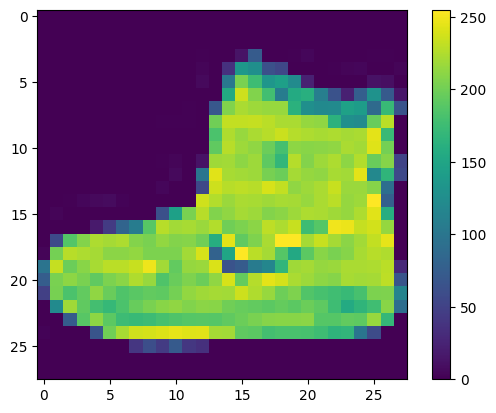

Botes


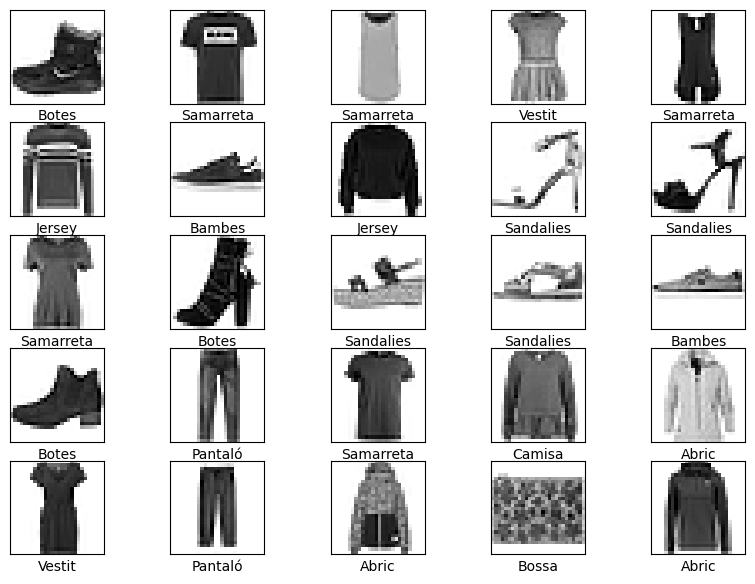



Epoch 1/20


1875/1875 [==============================] - 8s 3ms/step - loss: 0.5083 - accuracy: 0.8157
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3947 - accuracy: 0.8574
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3555 - accuracy: 0.8694
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8774
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3119 - accuracy: 0.8839
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.8891
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2827 - accuracy: 0.8942
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707 - accuracy: 0.8980
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9024
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0

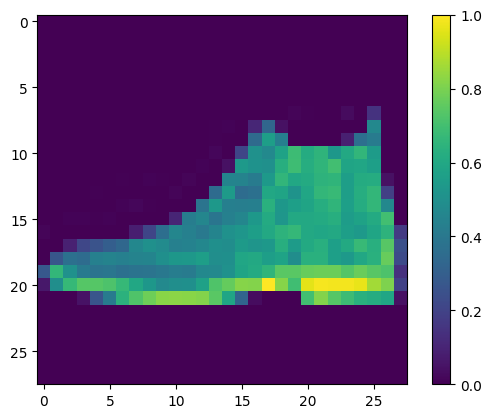


Test accuracy: 0.8888999819755554

Test loss: 0.38406458497047424
313/313 [==============================] - 1s 2ms/step
[1.73278292e-14 1.09895254e-13 2.11779570e-11 9.95960866e-12
 7.42411965e-11 3.83366256e-07 8.40043746e-12 7.85284967e-04
 2.44323244e-15 9.99214292e-01]
Botes
Desat amb èxit


In [1]:
# Aquest xarxa neuronal servirà per fer la predicció d'una peça de roba
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
'''
Anem a carregar un conjunt d'imatges en 10 categories. Aquestes imatges mostren artícles de roba individuals, en  una resolució de 28 x 28
'''
roba = keras.datasets.fashion_mnist
(imatges_entre, etiquetes_entre), (imatges_test,etiquetes_test) = roba.load_data()

print(imatges_entre.shape)
print(len(etiquetes_entre))
print(etiquetes_entre)
nom_roba=['Samarreta','Pantaló','Jersey','Vestit','Abric','Sandalies','Camisa','Bambes','Bossa','Botes']
print(nom_roba[etiquetes_entre[59999]])
# Anem a veure una imatge del dataset
x=0
plt.figure()
# Mostra la imarge del dataset
plt.imshow(imatges_entre[0]) # Mostra la primera imatge
plt.colorbar() # Mostra la imatge en color
plt.grid(False) # Elimina la graella
plt.show() # Mostra la imatge
print(nom_roba[etiquetes_entre[x]]) # Nom de la peça de roba
'''
Caldrà escar els valors entre 0 i 1, abans de carregar-los al model per fer-ho haurem de dividir les imatges entre 255.Perquè dividi entre 255 en una imarge els píxels tenen un valor entre 0 i 255, a on 0 significa negre i 255 blanc.
'''
imatges_entre = imatges_entre / 255.0
imatges_test = imatges_test / 255.0

# Anem a veure les primeres 25 imatges, segons el nou escalat
plt.figure(figsize=(10,10))
for i in range(25):
    #subplot per imprimir una imatge al costat d'una altra
    plt.subplot(7,5, i+1)
    plt.xticks([])
    plt.yticks([])
    # Per veure amb l'scala de grisos cmap
    plt.imshow(imatges_entre[i],cmap=plt.cm.binary)
    plt.xlabel(nom_roba[etiquetes_entre[i]])
plt.show()
# Creació del model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='selu'),
    keras.layers.Dense(256,activation='selu'),
    keras.layers.Dense(10,activation='softmax')# Funció d'activació softmax, és una forma multidimensional
])
'''
Compila el model, construir la xarxa neuronal, requereix configurar les capes i després compilar
categorical_entropy significa que la nostra sortida ha de tenir ...
'''
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(imatges_entre,etiquetes_entre,epochs=20)
scores = model.evaluate(imatges_entre,etiquetes_entre)
print(model.metrics_names[1],scores[1]*100)
print(model.predict(imatges_entre))

print(model.predict(imatges_test))
print(nom_roba[etiquetes_test[3]])

# Veure la primera imarge del conjunt de dades  de test
plt.figure()
plt.imshow(imatges_test[0])
plt.colorbar()
plt.grid(False)
plt.show();
print
nom_roba[etiquetes_test[0]]
'''
Evaluar la exactitud del model amb el conjunt de dades d'entrenament per tenir una estimació mes exacta.
La finalitat última d'un modes és fer la predicció de la variable resposta, en observacions futures o en observacions de dades que no hagi vist mai.
'''
test_loss, test_acc = model.evaluate(imatges_test,etiquetes_test,verbose=0)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
'''
Anem a fer les prediccions del conjunt d'imatges de test, sense les etiuetes de supervisió
'''
Prediccions =model.predict(imatges_test)
print(Prediccions[0])

'''
En una matriu de numpy, tenim la funció argmax, aquesta funció retorna la posició del valor més gran d'una matriu
'''
print(nom_roba[np.argmax(Prediccions[0])])
# Desar el model exportant a un fitxer JSON
model_json=model.to_json()
with  open("modelMNIST.json","w") as json_file:
    json_file.write(model_json)
# repartir els pesos a HDF5
model.save_weights("modelMNIST.h5")
print("Desat amb èxit")